## **Importing Necessary Libraries**

In [91]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 5.2 MB/s 
     |████████████████████████████████| 6.3 MB 43.5 MB/s 
     |████████████████████████████████| 16.7 MB 289 kB/s 


In [92]:
import pandas as pd
import seaborn as sns
import missingno as mnso
from matplotlib import pyplot as plt
import re
from matplotlib.colors import ListedColormap
import geopandas as gpd

## **Importing Data**

In [61]:
QS_data = pd.read_csv('qs-world--ranking.csv')
QS_data

,university,year,rank_display,score,link,country,city,region,logo,type,research_output,student_faculty_ratio,international_students,size,faculty_count
0,Massachusetts Institute of Technology (MIT),2017,1,100.0,https://www.topuniversities.com/universities/m...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,4.0,"3,730",M,"3,065"
1,Stanford University,2017,2,98.7,https://www.topuniversities.com/universities/s...,United States,Stanford,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,3.0,"3,879",L,"4,725"
2,Harvard University,2017,3,98.3,https://www.topuniversities.com/universities/h...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,5.0,"5,877",L,"4,646"
3,University of Cambridge,2017,4,97.2,https://www.topuniversities.com/universities/u...,United Kingdom,Cambridge,Europe,https://www.topuniversities.com/sites/default/...,Public,Very high,4.0,"7,925",L,"5,800"
4,California Institute of Technology (Caltech),2017,5,96.9,https://www.topuniversities.com/universities/c...,United States,Pasadena,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,2.0,692,S,968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6477,Université de Tunis,2022,1201,NaN,https://www.topuniversities.com/universities/u...,Tunisia,Tunis,Africa,https://www.topuniversities.com/sites/default/...,Public,High,17.0,57,L,"1,174"
6478,Université de Tunis El Manar,2022,1201,NaN,https://www.topuniversities.com/universities/u...,Tunisia,Tunis,Africa,https://www.topuniversities.com/sites/default/...,Public,Very High,8.0,585,L,"3,504"
6479,Yarmouk University,2022,1201,NaN,https://www.topuniversities.com/universities/y...,Jordan,Irbid,Asia,https://www.topuniversities.com/sites/default/...,Public,Medium,31.0,"2,826",XL,"1,113"
6480,Yildiz Technical University,2022,1201,NaN,https://www.topuniversities.com/universities/y...,Turkey,Istanbul,Asia,https://www.topuniversities.com/sites/default/...,Public,High,20.0,"2,394",XL,"1,688"


## **Data Understanding**

In [62]:
QS_data.shape

(6482, 15)

In [63]:
QS_data.dtypes

university                 object
year                        int64
rank_display               object
score                     float64
link                       object
country                    object
city                       object
region                     object
logo                       object
type                       object
research_output            object
student_faculty_ratio     float64
international_students     object
size                       object
faculty_count              object
dtype: object

In [64]:
QS_data.isna().sum()

university                   0
year                         0
rank_display                68
score                     3662
link                         0
country                      0
city                       178
region                       0
logo                         0
type                        12
research_output              2
student_faculty_ratio       75
international_students     164
size                         2
faculty_count               78
dtype: int64

In [65]:
QS_data.describe(include = 'all')

,university,year,rank_display,score,link,country,city,region,logo,type,research_output,student_faculty_ratio,international_students,size,faculty_count
count,6482,6482.000000,6414,2820.000000,6482,6482,6304,6482,6482,6470,6480,6407.000000,6318,6480,6404
unique,1368,NaN,517,NaN,1366,97,866,6,1378,2,5,NaN,1182,4,1176
top,Massachusetts Institute of Technology (MIT),NaN,801-1000,NaN,https://www.topuniversities.com/universities/m...,United States,London,Europe,https://www.topuniversities.com/sites/default/...,Public,Very High,NaN,2.270,L,613
freq,6,NaN,954,NaN,6,968,98,2479,6,5284,4558,NaN,18,3062,23
mean,NaN,2019.693613,NaN,46.595532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.264554,NaN,NaN,NaN
std,NaN,1.716683,NaN,18.813110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.604294,NaN,NaN,NaN
min,NaN,2017.000000,NaN,23.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,NaN,2018.000000,NaN,31.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,NaN
50%,NaN,2020.000000,NaN,40.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,NaN,NaN,NaN
75%,NaN,2021.000000,NaN,58.025000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.000000,NaN,NaN,NaN


In [66]:
QS_data['university'].nunique()

1368

In [67]:
QS_data['country'].nunique()

97

In [68]:
Percentage_of_Nan_values = round(QS_data.isna().mean()*100,1)
missing_percent = pd.DataFrame(Percentage_of_Nan_values[Percentage_of_Nan_values>0],columns=['Missing Values Percentage'])
missing_percent

,Missing Values Percentage
rank_display,1.0
score,56.5
city,2.7
type,0.2
student_faculty_ratio,1.2
international_students,2.5
faculty_count,1.2


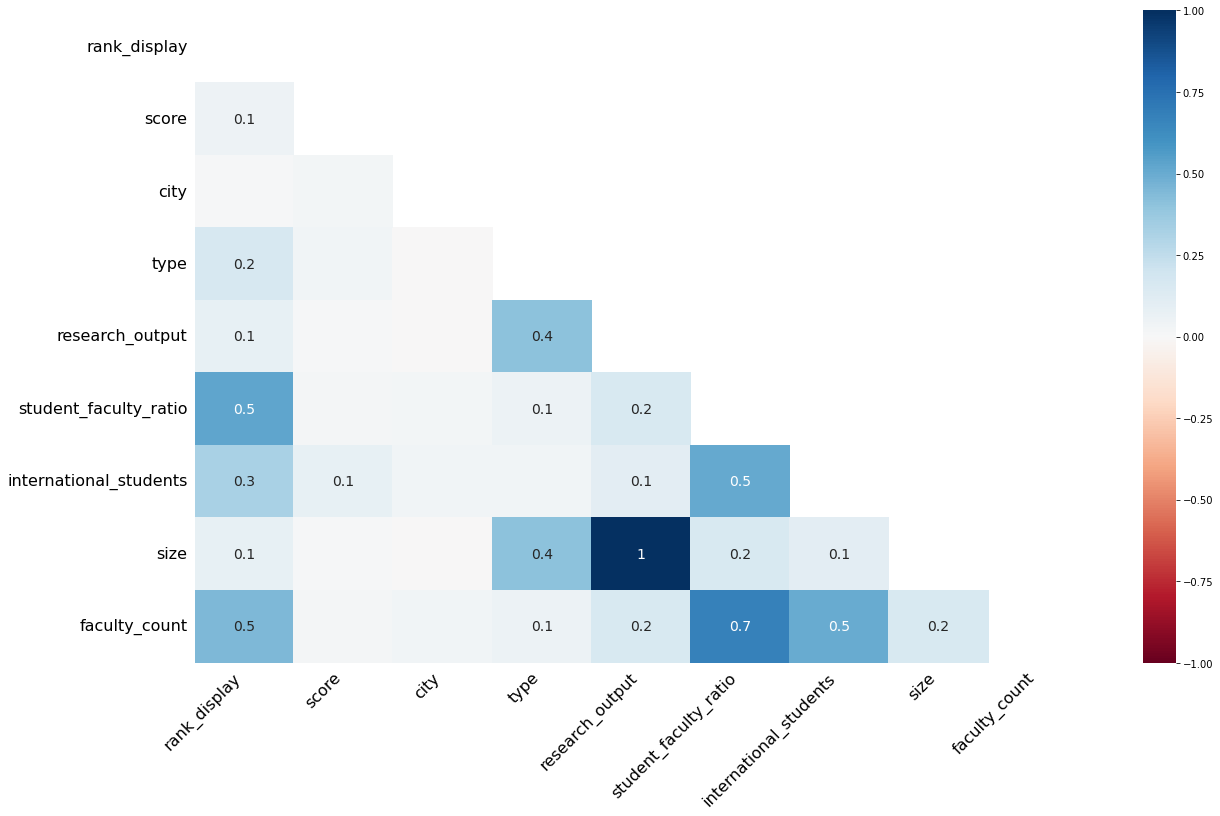

In [69]:
mnso.heatmap(QS_data)
plt.show()


## **Data Cleaning**

In [58]:
print(len(QS_data[QS_data.isnull().sum(axis=1) > 4]))
drop_index = QS_data[QS_data.isnull().sum(axis=1) > 4].index.to_list()
QS_data.drop(drop_index, inplace=True)


22


Let's drop 'link' and 'logo' column as they are hyperlinks. Although 'score' column can be very useful for analysis, its missing nearly 56% values. When I looked for these values on the QS website, I could see they have given a score only for the top 500 universities although 1000+ universities have been ranked. So, I'm ignoring this column as well.

In [70]:
QS_data = QS_data.drop(labels =['link','logo','score'],axis = 1, inplace = False)
QS_data

,university,year,rank_display,country,city,region,type,research_output,student_faculty_ratio,international_students,size,faculty_count
0,Massachusetts Institute of Technology (MIT),2017,1,United States,Cambridge,North America,Private,Very High,4.0,"3,730",M,"3,065"
1,Stanford University,2017,2,United States,Stanford,North America,Private,Very High,3.0,"3,879",L,"4,725"
2,Harvard University,2017,3,United States,Cambridge,North America,Private,Very High,5.0,"5,877",L,"4,646"
3,University of Cambridge,2017,4,United Kingdom,Cambridge,Europe,Public,Very high,4.0,"7,925",L,"5,800"
4,California Institute of Technology (Caltech),2017,5,United States,Pasadena,North America,Private,Very High,2.0,692,S,968
...,...,...,...,...,...,...,...,...,...,...,...,...
6477,Université de Tunis,2022,1201,Tunisia,Tunis,Africa,Public,High,17.0,57,L,"1,174"
6478,Université de Tunis El Manar,2022,1201,Tunisia,Tunis,Africa,Public,Very High,8.0,585,L,"3,504"
6479,Yarmouk University,2022,1201,Jordan,Irbid,Asia,Public,Medium,31.0,"2,826",XL,"1,113"
6480,Yildiz Technical University,2022,1201,Turkey,Istanbul,Asia,Public,High,20.0,"2,394",XL,"1,688"


In [130]:
QS_data['international_students'] = QS_data['international_students'].str.replace(',','')
QS_data['faculty_count'] = QS_data['faculty_count'].str.replace(',','')
QS_data['research_output'] = QS_data['research_output'].str.replace('Very high','Very High')

In [131]:
QS_data.head()

,university,year,rank_display,country,city,region,type,research_output,student_faculty_ratio,international_students,size,faculty_count
0,Massachusetts Institute of Technology (MIT),2017,10.0,United States,Cambridge,North America,Private,Very High,4.0,3730,M,3065
1,Stanford University,2017,20.0,United States,Stanford,North America,Private,Very High,3.0,3879,L,4725
2,Harvard University,2017,30.0,United States,Cambridge,North America,Private,Very High,5.0,5877,L,4646
3,University of Cambridge,2017,40.0,United Kingdom,Cambridge,Europe,Public,Very High,4.0,7925,L,5800
4,California Institute of Technology (Caltech),2017,50.0,United States,Pasadena,North America,Private,Very High,2.0,692,S,968


What is the use of import **re**?
Python RegEx. A RegEx, or Regular Expression, is a sequence of characters that forms a search pattern. RegEx can be used to check if a string contains the specified search pattern.

In [78]:
QS_data['rank_display'] = QS_data['rank_display'].apply(lambda x: float(re.sub(r'\W+', '', str(x))))
QS_data['rank_display'] 

0          10.0
1          20.0
2          30.0
3          40.0
4          50.0
         ...   
6477    12010.0
6478    12010.0
6479    12010.0
6480    12010.0
6481    12010.0
Name: rank_display, Length: 6482, dtype: float64

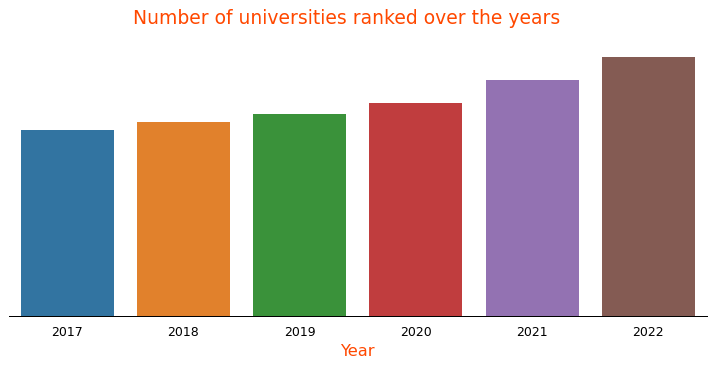

In [96]:
year_df = QS_data['year'].value_counts().sort_values()
fig, ax = plt.subplots(figsize=(10,4), dpi=90)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(bottom=False)
ax.get_yaxis().set_visible(False)

sns.countplot(data=QS_data, x='year');


ax.set_xlabel('Year', fontsize=13, color = '#ff4800');
fig.suptitle('Number of universities ranked over the years', fontsize=15, color = '#ff4800');


With each year, more and more universities are considered for the rankings and 2022 has the highest number of universities.

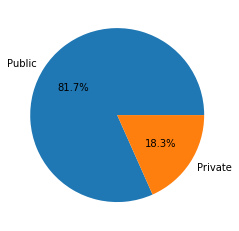

In [100]:
plt.pie(QS_data['type'].value_counts().values, labels = QS_data['type'].value_counts().index,autopct='%1.1f%%') 
plt.show()

In [101]:
QS_data['region'] = QS_data['region'].str.replace('Latin America','South America')

In [103]:
region_sum = pd.DataFrame(QS_data['region'].value_counts().reset_index())
region_sum

,index,region
0,Europe,2479
1,Asia,1834
2,North America,1126
3,South America,653
4,Oceania,268
5,Africa,122


## **Universities by Continents**

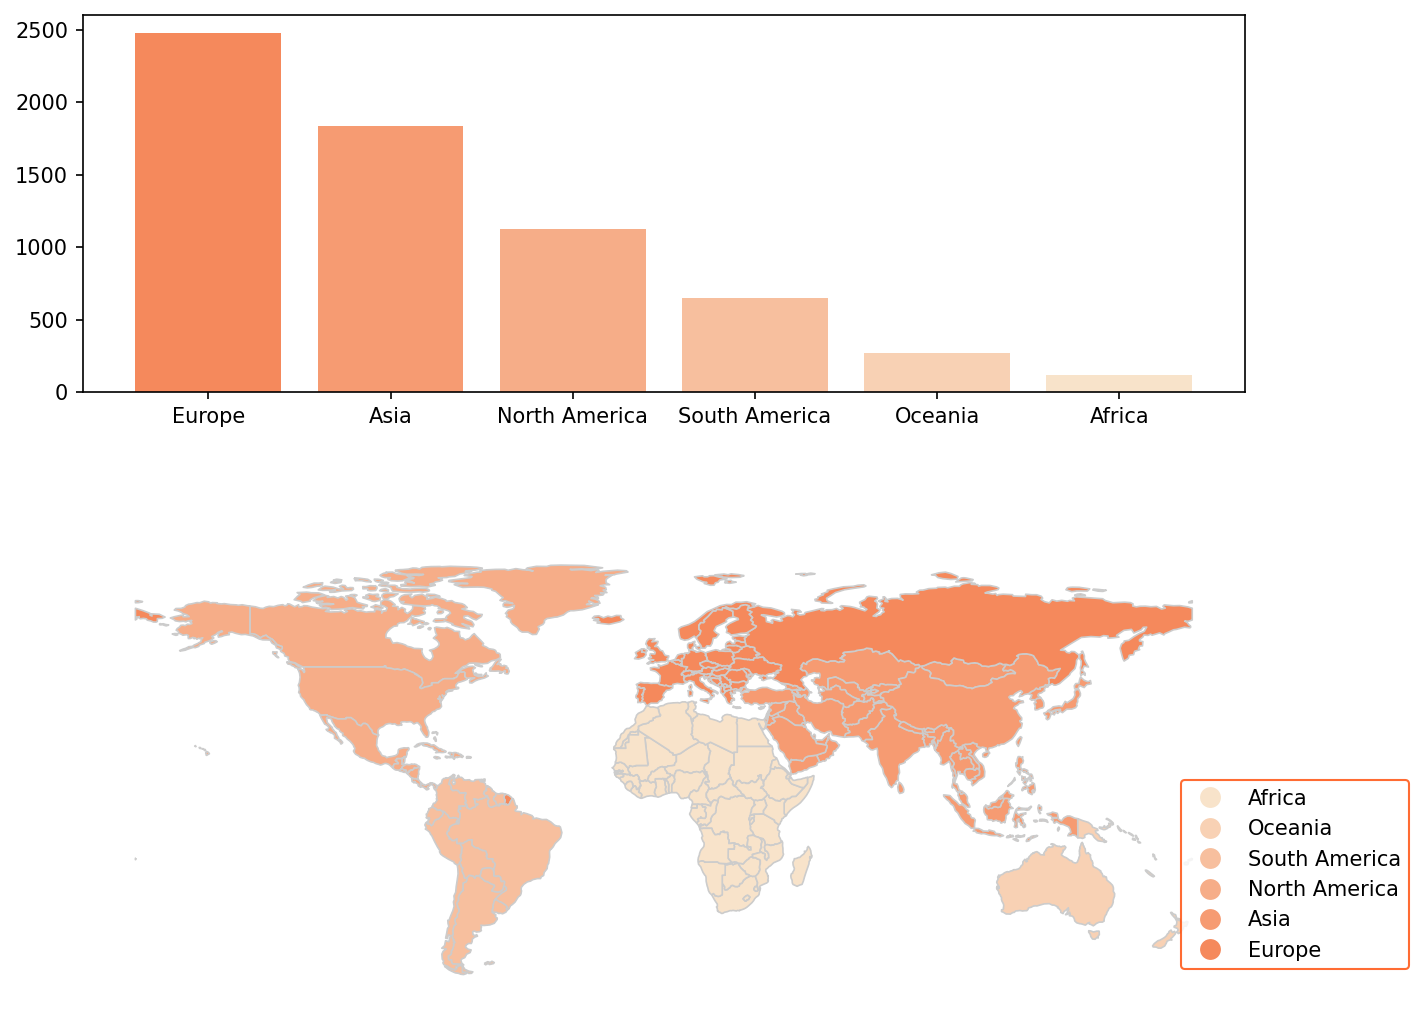

In [115]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), dpi=150, gridspec_kw={'height_ratios': [1, 2]})
colors = ['#f8e3ca','#f8d1b4','#f7bf9e','#f6ad88','#f69b72','#f5895c']
cmap = ListedColormap(colors)
ax1.bar(region_sum['index'], region_sum['region'],color=colors[::-1])

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')) # Creating World Map
worldmap_df = world.set_index('continent').join(region_sum.set_index('index')).reset_index()
to_be_mapped = 'region'
legend_labels = region_sum['index'].tolist()[::-1]

worldmap_df.plot(column=to_be_mapped, 
            cmap=cmap, 
            linewidth=0.8, 
            ax=ax2, 
            edgecolors='0.8', 
            legend=True, 
            categorical=True,
           )

leg = ax2.get_legend()
for text, label in zip(leg.get_texts(), legend_labels):
    text.set_text(label)

    leg.set_bbox_to_anchor((1.15,0.5))
# leg.edgecolors('#ff4800')
frame = leg.get_frame()
frame.set_edgecolor('#ff4800')
ax2.set_axis_off()
plt.subplots_adjust(wspace=0, hspace=0)

Europe tends to be the continent with more number of universities though we have to consider the fact that they have included Russia in Europe although it belongs to both Europe and Asia. It is followed by Asia and North America.

## **Universities by Countries**

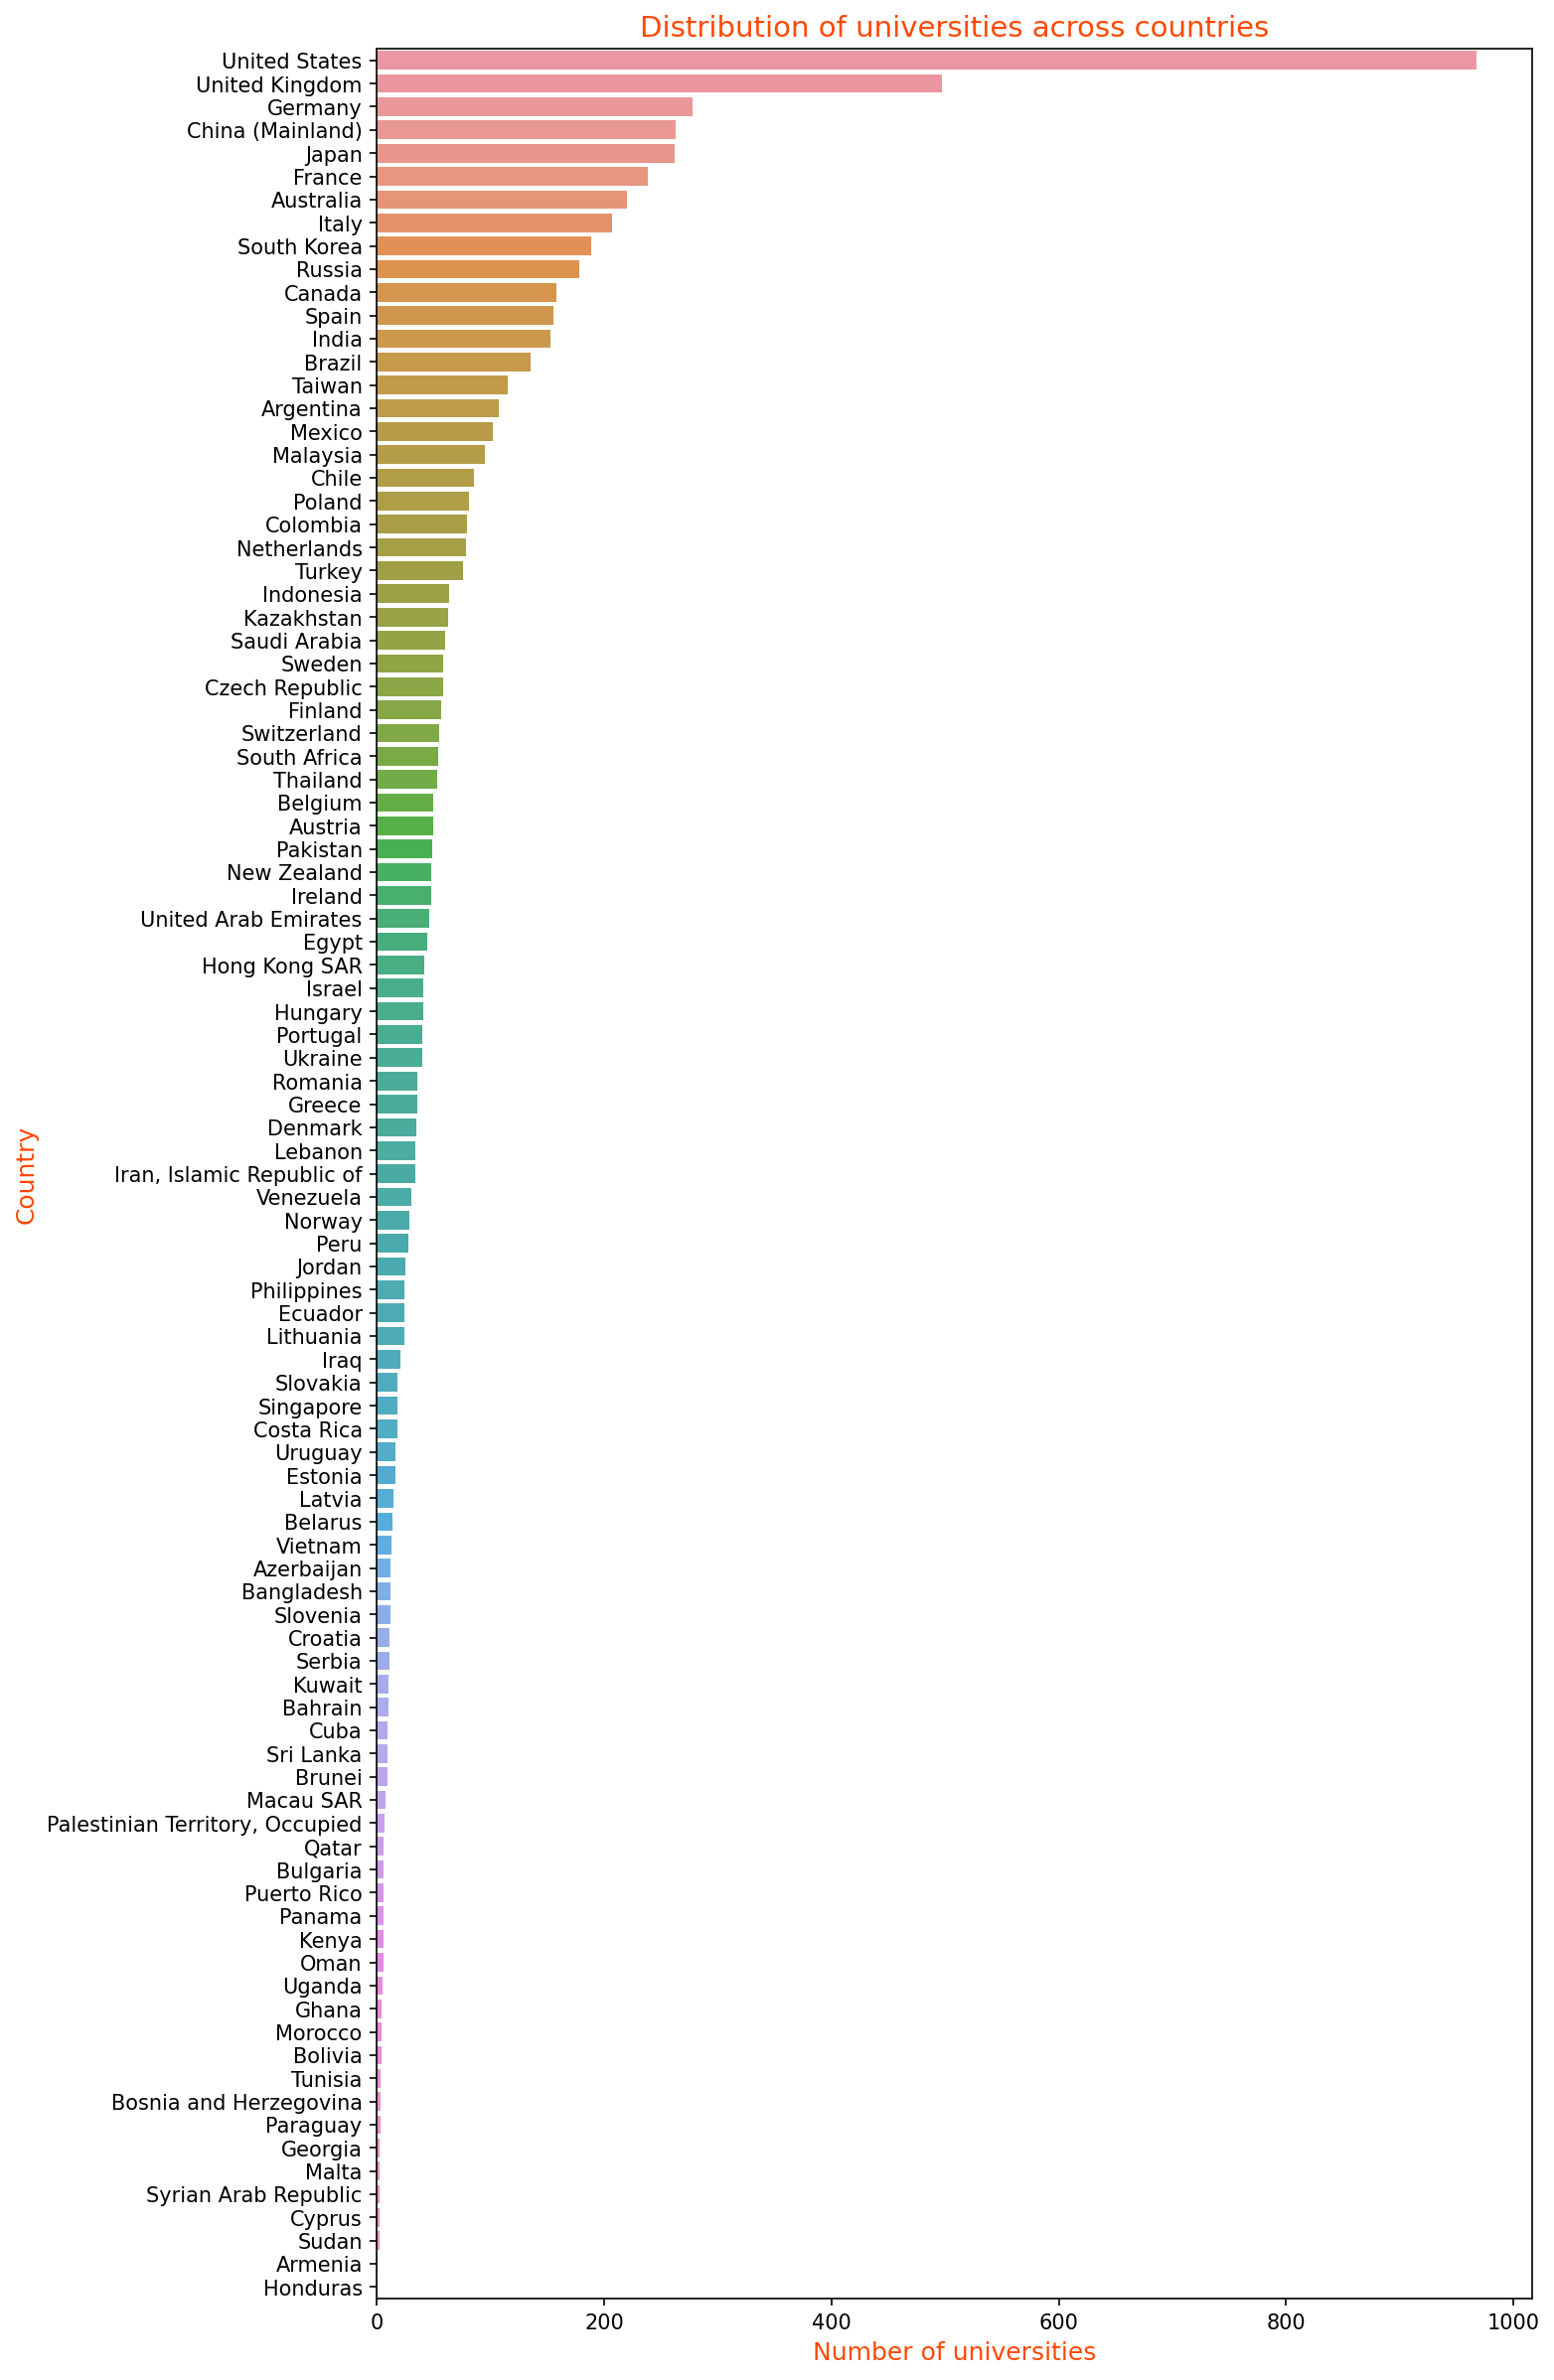

In [118]:
uni_df = QS_data['university'].value_counts()

fig, ax = plt.subplots(figsize=(10,20), dpi=150)

sns.countplot(data=QS_data, y='country', order=QS_data.country.value_counts().index);
plt.xlabel('Number of universities', fontsize=12, color = '#ff4800')
plt.ylabel('Country', fontsize=12, color = '#ff4800')
plt.title("Distribution of universities across countries", fontsize=14, color = '#ff4800');

# plt.savefig('countrywise.png')

## **Universities by Cities**

In [119]:
sorted_df = QS_data.sort_values(by='rank_display').drop_duplicates('university')
sorted_df = pd.DataFrame(sorted_df['city'].value_counts()[:20])

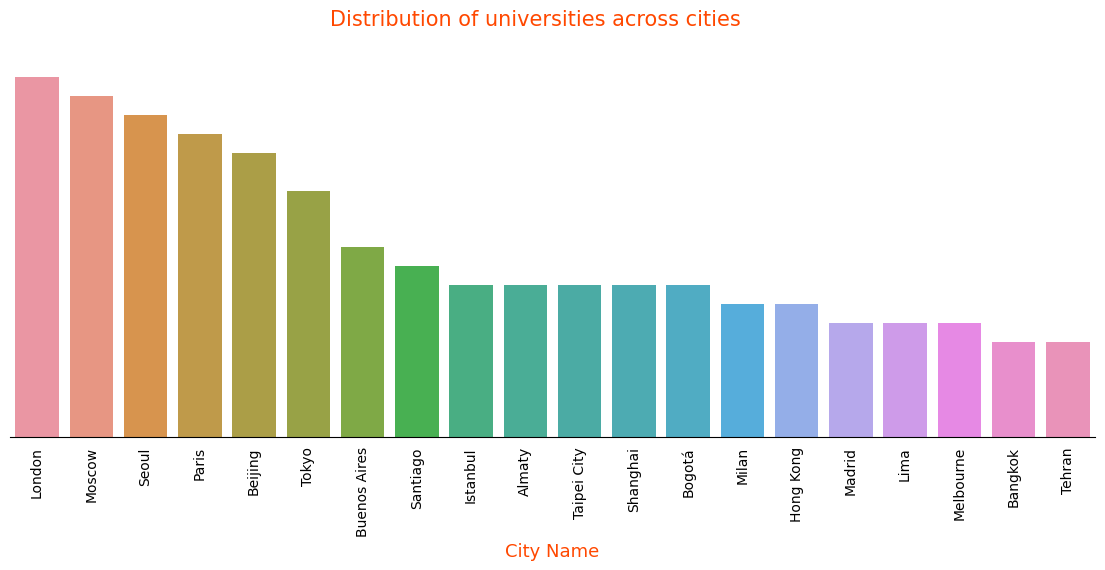

In [122]:
fig, ax = plt.subplots(figsize=(14,5), dpi=100)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(bottom=False)
ax.get_yaxis().set_visible(False)

sns.barplot(data=sorted_df, y='city', x=sorted_df.index)
plt.xticks(rotation=90);

ax.set_xlabel('City Name', fontsize=13, color = '#ff4800');
fig.suptitle('Distribution of universities across cities', fontsize=15, color = '#ff4800');


## **Ranking of Top 10 Universities**

In [123]:
# university_df.sort_values('rank_display')[:60]
top_unis = ['Massachusetts Institute of Technology (MIT) ', 'Stanford University', 'University of Oxford', 'Harvard University', 
            'University of Cambridge', 'California Institute of Technology (Caltech)',
            'ETH Zurich - Swiss Federal Institute of Technology', 'Imperial College London', 'UCL', 'University of Chicago']
topunis_df = QS_data[QS_data['university'].isin(top_unis)][['year','university','rank_display']].reset_index(drop=True)

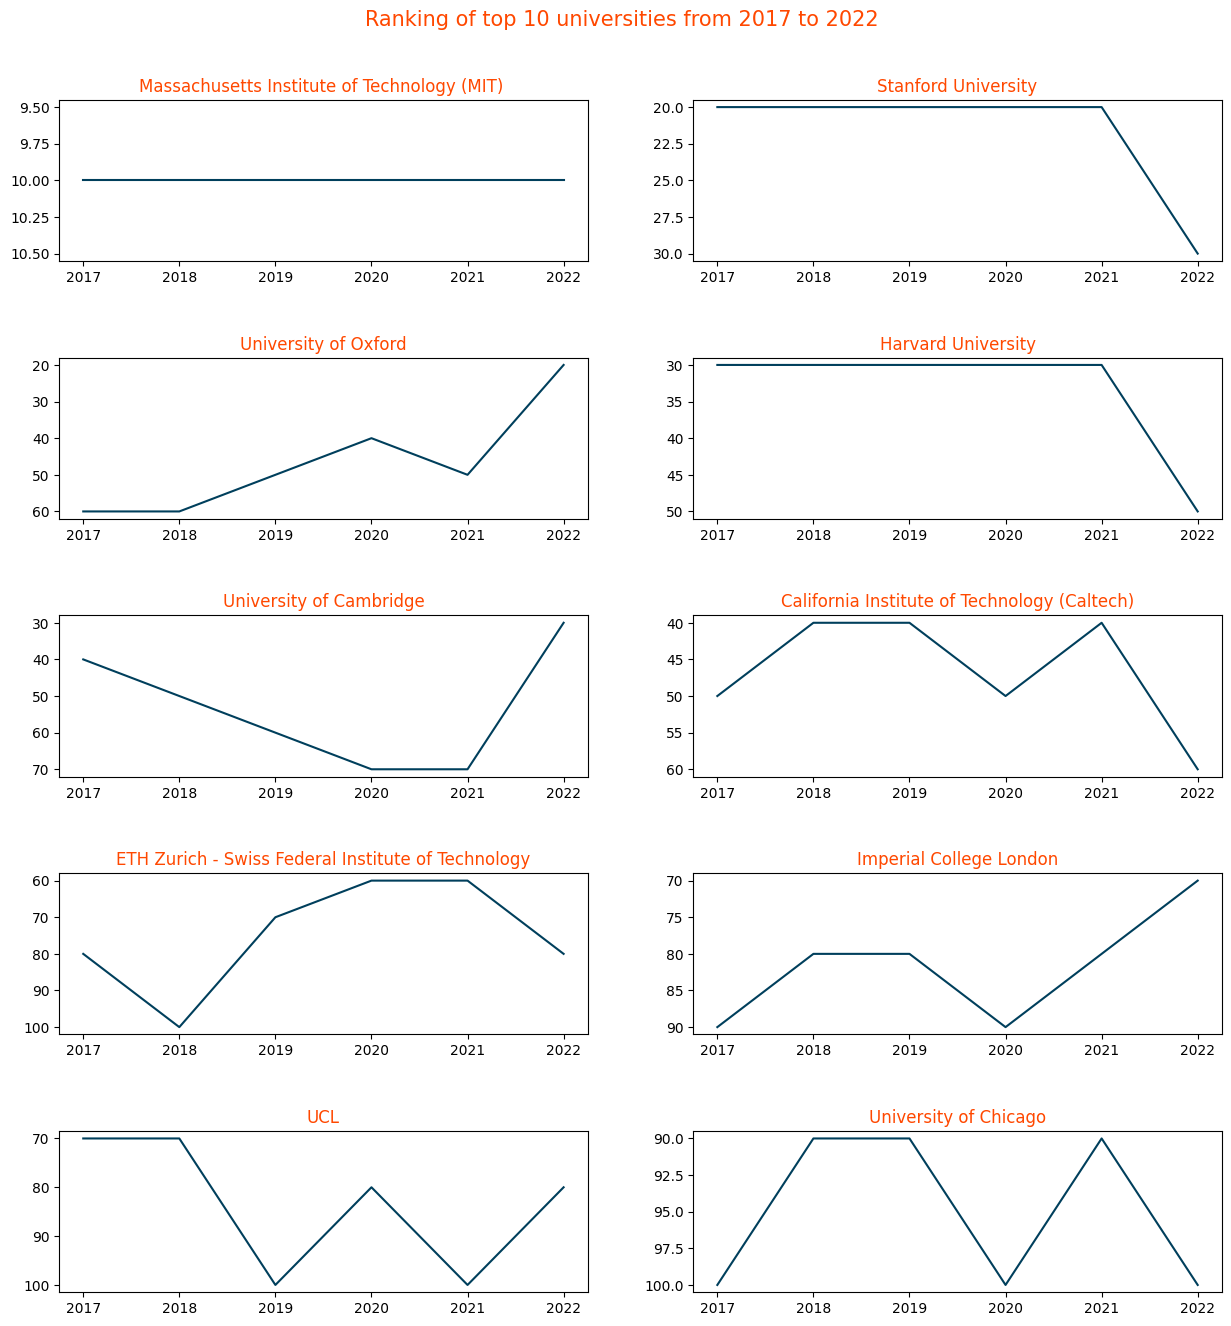

In [124]:
fig = plt.figure(figsize=(15,15), dpi=100)

for uni, i in zip(top_unis, range(1, 11)):
    new_df = topunis_df[topunis_df['university'] == uni]
    ax = fig.add_subplot(5, 2, i)
    ax.plot(new_df['year'], new_df['rank_display'], color='#003f5c', linewidth=1.5)
    plt.gca().invert_yaxis()
    ax.set_title(uni, color='#ff4800')
    
fig.subplots_adjust(wspace=0.2, hspace=0.6, top=0.92)
fig.suptitle('Ranking of top 10 universities from 2017 to 2022', fontsize=15, color = '#ff4800');

By taking a quick look at the dataframe, I have made a list of the top 10 universities ranked over the years. These 10 universities have a tendency to occupy the top 10 positions consistently.
MIT tends to be undisputed king in terms of QS Rankings, ranked number 1 always.
Stanford and Harvard have dropped down this year for the first time since 2017.
University of Oxford, the oldest university in the English-speaking world, has jumped from Rank 6 to Rank 2.
On an overall scale, universities from UK have spiked up on their rankings compared to the US universities most of which have dropped down this year (2022).
Out of the top 10, Only one university, ETH Zurich (Switzerland), is from a country other than US or UK.

## **Research Output**

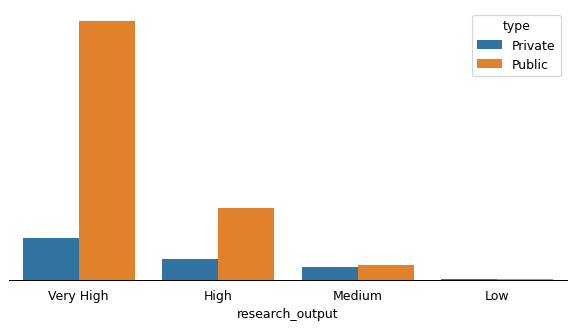

In [132]:
fig, ax = plt.subplots(figsize=(8,4), dpi=90)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.tick_params(bottom=False)
ax.get_yaxis().set_visible(False)

sns.countplot(data=QS_data, x='research_output', hue='type');



Clearly, most number of universities under consideration have "Very High" research output. Public universities outperform private universities in terms of research.


In [136]:
research_size = pd.DataFrame(QS_data.groupby(['research_output']).apply(lambda df: df['size'].value_counts()))
research_size

size
research_output         
High            L    767
                XL   380
                M    204
                S     73
Low             M     20
                L     10
                S     10
                XL     6
Medium          L    197
                XL   106
                M     99
                S     22
Very High       L   2088
                XL  1139
                M   1069
                S    290

## **Student Faculty Ratio**

In [137]:
QS_data['student_faculty_ratio'].describe()

count    6407.000000
mean       13.264554
std         6.604294
min         1.000000
25%         9.000000
50%        12.000000
75%        17.000000
max        67.000000
Name: student_faculty_ratio, dtype: float64

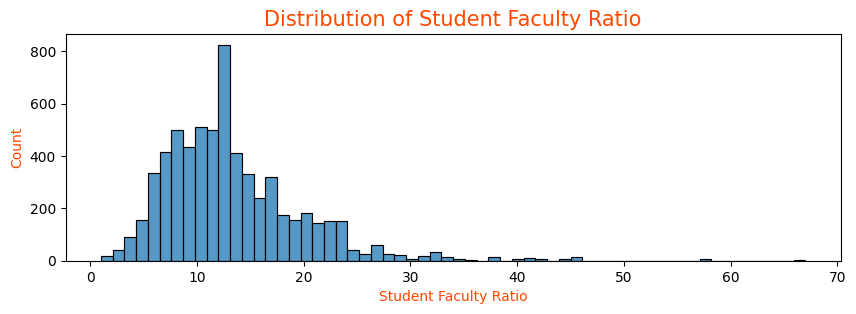

In [139]:
plt.figure(figsize=(10,3), dpi=100)
sns.histplot(data=QS_data, x='student_faculty_ratio', bins=60);
plt.xlabel('Student Faculty Ratio', color = '#ff4800')
plt.ylabel('Count', color = '#ff4800')
plt.title('Distribution of Student Faculty Ratio', fontsize=15, color = '#ff4800');

We have a right skewed distribution. The outliers doesn't seem to affect the mean much. Most of the universities have somewhere between 5 to 20 students per faculty.

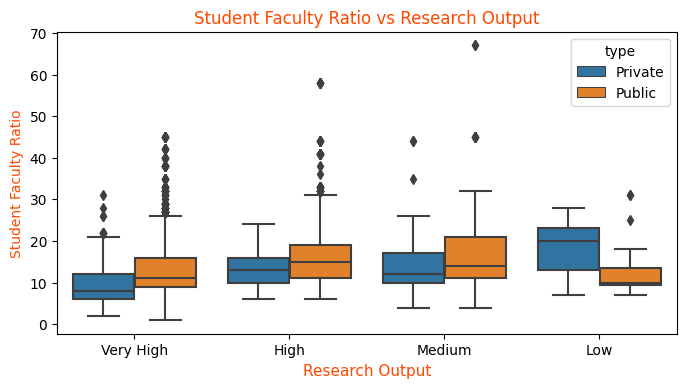

In [140]:
plt.figure(figsize=(8,4), dpi=100)
sns.boxplot(data=QS_data, y='student_faculty_ratio', x='research_output', hue='type');
plt.xlabel('Research Output', fontsize=11, color = '#ff4800')
plt.ylabel('Student Faculty Ratio',color = '#ff4800')
plt.title('Student Faculty Ratio vs Research Output', color = '#ff4800');

Obviously, universities with "Very High" research output have very less "student faculty ratio" compared to the rest of them.

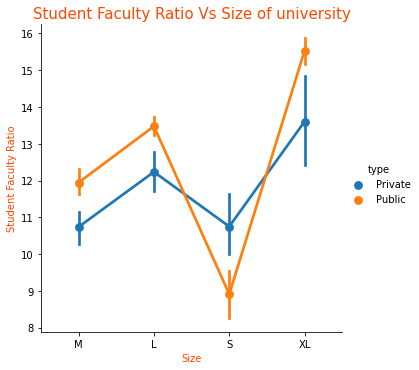

In [141]:
sns.catplot(x="size", y="student_faculty_ratio", kind="point", data=QS_data, hue='type');
plt.xlabel('Size', color = '#ff4800')
plt.ylabel('Student Faculty Ratio', color = '#ff4800')
plt.title('Student Faculty Ratio Vs Size of university', fontsize=15, color = '#ff4800');

Private universities have very less "student faculty ratio" compared to the public universities when it comes to the size. Another interesting observation is that the average "student faculty ratio" seems to increase with increase in the "size" of the university.